In [4]:
import numpy as np

import numba as nb

import pandas as pd

## 4.0 Cython

In [5]:
%load_ext Cython

In [6]:
def primes(kmax):
    """Calculation of prime numbers in standard Python syntax"""

    p = list(range(1000))
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [7]:
@nb.autojit
def primesjit(kmax):
    """Calculation of prime numbers in standard Python syntax"""

    p = list(range(1000))
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [18]:
%%cython 

def primescy(int kmax):
    """Calculation of prime numbers with additional
    Cython keywords"""

    cdef int n, k, i
    cdef int p[1000]
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result



In [9]:
plain = %timeit -n 5 -o primes(500)

15.1 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [10]:
jitted = %timeit -n 5 -o primesjit(500)

The slowest run took 78.49 times longer than the fastest. This could mean that an intermediate result is being cached.
7.42 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [11]:
cy = %timeit -n 5 -o primescy(500)

835 µs ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [12]:
plain.best/jitted.best

22.750627190175873

In [13]:
plain.best / cy.best

17.904974015745086

## ok lets try now to see how it behaves when kmax is getting larger

In [16]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.pyplot as plt

#code to measure for kmax 1 to 500

#df = pd.DataFrame(columns=['num','plain','jit','cython'])
#for i in range(1,500):
#    pl = %timeit -n 5 -o primes(i)
#    jt = %timeit -n 5 -o primesjit(i)
#    cy = %timeit -n 5 -o primescy(i)
#    df = df.append({'num': i,'plain':pl.best,'jit':jt.best,'cython':cy.best}, ignore_index=True)
    
#however instead of running it loading a previously saved one 

df = pd.read_csv('primesresults.csv')



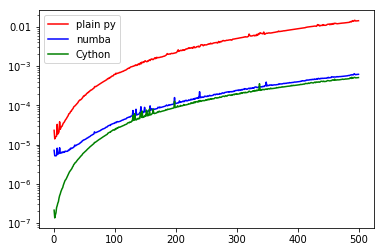

In [17]:
%matplotlib inline

plt.plot( df.num,df.plain, 'r',label='plain py')
plt.plot (df.num,df.jit, 'b',label='numba')
plt.plot(df.num,df.cython, 'g',label='Cython')
plt.legend()
plt.yscale('logit')

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()